## Irvin Andres Torres Enriquez
### Implementación con Random Forest /Decisión Forest/
### Machine learning, MIC
### Olanda Prieto

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [88]:
data = pd.read_csv('eventos.csv')

In [89]:
print(data.head())
print(data.info())

   Year     County  PSI  ... Count  Population  ObsRate
0  2005  STATEWIDE   21  ...   321    26447738     1.21
1  2006  STATEWIDE   21  ...   341    26679904     1.28
2  2007  STATEWIDE   21  ...   353    26935982     1.31
3  2008  STATEWIDE   21  ...   346    27272108     1.27
4  2009  STATEWIDE   21  ...   308    27630962     1.11

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4543 non-null   int64  
 1   County          4543 non-null   object 
 2   PSI             4543 non-null   int64  
 3   PSIDescription  4543 non-null   object 
 4   Count           4543 non-null   int64  
 5   Population      4543 non-null   int64  
 6   ObsRate         4543 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 248.6+ KB
None


In [90]:
data['County'] = data['County'].replace('STATEWIDE', 'Statewide')
data = data[~data.County.isin(['Alpine', 'Sierra'])]

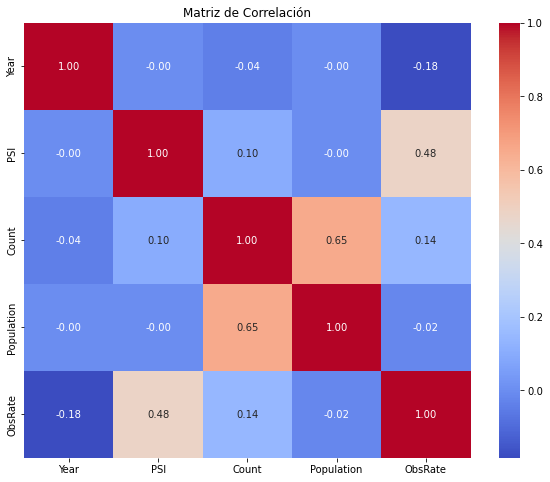

In [91]:
# Convertir variables categóricas en variables dummy
data_encoded = pd.get_dummies(data, columns=['County', 'PSIDescription'], drop_first=True)

# Filtrar solo las columnas numéricas
numeric_data = data_encoded.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [99]:
# Suponiendo que ya tienes tu DataFrame 'data'
X = data[['Year', 'County', 'PSIDescription']]
y = data['ObsRate']

# Dividir los datos en Train/Val y Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir nuevamente Train/Val en Train y Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
numeric_features = ['Year']  # 'Year' es numérica
categorical_features = ['County', 'PSIDescription']  # 'County' y 'PSIDescription' son categóricas

# Crear un preprocesador para las columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Escalar columnas numéricas
        ('cat', OneHotEncoder(), categorical_features)  # Codificar columnas categóricas
    ])

# Crear un pipeline que primero preprocesa y luego ajusta el modelo
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))  # Random Forest con 100 árboles
])

# Definir la cuadrícula de parámetros para el modelo
param_grid_rf = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

# Crear GridSearchCV usando el pipeline
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5)

# Ajustar el modelo con los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search_rf.best_params_}")

# Realizar predicciones con el mejor modelo
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

# Calcular y mostrar las métricas de desempeño
from sklearn.metrics import mean_squared_error, r2_score
print(f'R²: {r2_score(y_test, y_pred_rf)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf)}')

Mejores parámetros: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}
R²: 0.8551868884852707
MSE: 33.29264918881549


In [103]:
# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search_rf.best_estimator_

# Guardar el modelo en un archivo .sav
joblib.dump(best_model, 'random_forest.sav')

['random_forest.sav']